In [1]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import torch
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

/home/pedke/multi-task-learning/pedke-venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def fix_error(path):
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_AREA)
    mask[mask > 0] = 1
    mask = np.where(mask == 1, 0, 1)
    
    return mask

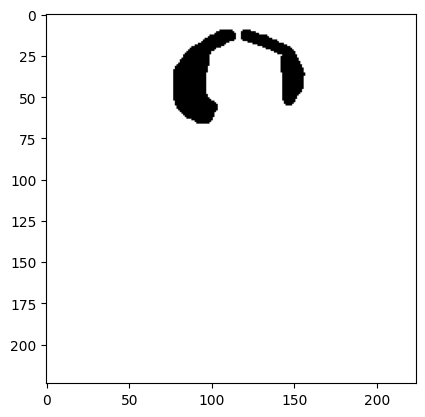

In [191]:
fingers = fix_error("/home/pedke/dataset/datasets/15-October-23_split - no_special_chars/val/masks/DSC07564_glans.png")
plt.imshow(fingers, cmap='gray')

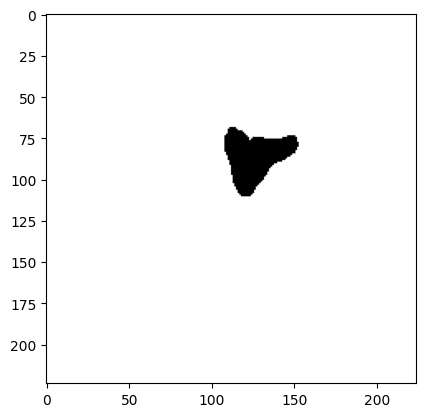

In [104]:
glans = fix_error("/home/pedke/dataset/datasets/15-October-23_split - no_special_chars/val/masks/DSC04054_penoscrotaljunction.png")
plt.imshow(glans, cmap='gray')

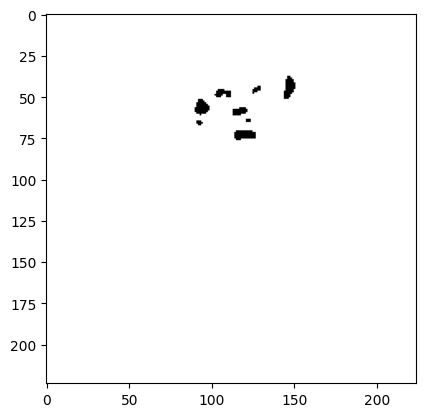

In [210]:
foreskin = fix_error("/home/pedke/multi-task-learning/wandb/run-20231030_171825-8sdimbqk/files/saved_img_preds/Val/datamode=val/DSC07564/Meatus/pred-37.png")
plt.imshow(foreskin, cmap='gray')

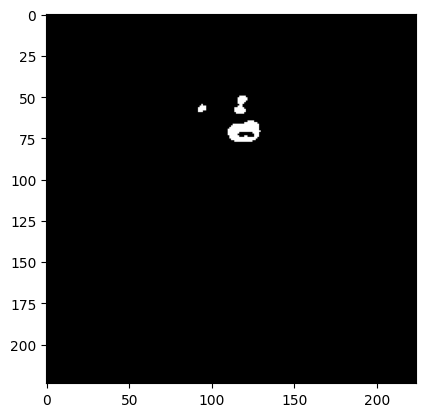

In [223]:
foreskin = np.where(foreskin == 1, 0, 1)
glans = np.where(glans == 1, 0, 1)
seg_pred = seg_pred + seg#foreskin + glans
seg_pred[seg_pred > 0] = 1
seg_pred = np.uint8(seg_pred)
plt.imshow(seg_pred, cmap='gray')

In [227]:
np.unique(fingers), np.unique(seg_pred), np.unique(glans)

(array([0, 1]), array([0, 1], dtype=uint8), array([0, 1]))

<class 'numpy.ndarray'> (224, 224) uint8


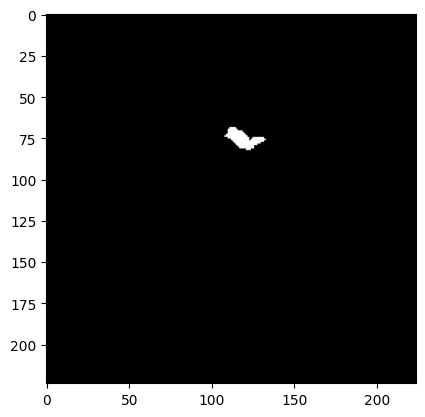

In [265]:
seg_pred = np.uint8( seg_pred  *  glans)
print(type(seg_pred), seg_pred.shape, seg_pred.dtype)

plt.imshow(seg_pred, cmap='gray')

In [263]:
img_path = '/home/pedke/dataset/datasets/15-October-23_split - no_special_chars/train/images/5.0 Hipospadia peniana proximal, uretra hipoplasica, caput do.JPG'
seg_path = '/home/pedke/multi-task-learning/wandb/run-20231030_161418-its4ero1/files/saved_img_preds/Train/5.0 Hipospadia peniana proximal, uretra hipoplasica, caput do/Glans/gt.png'
seg_pred_path = "/home/pedke/multi-task-learning/wandb/run-20231030_161418-its4ero1/files/saved_img_preds/Train/5.0 Hipospadia peniana proximal, uretra hipoplasica, caput do/Glans/pred-33.png"

In [264]:

main = cv2.imread(img_path) #, cv2.IMREAD_GRAYSCALE)
#main = cv2.cvtColor(main, cv2.COLOR_GRAY2BGR)
main = cv2.cvtColor(main, cv2.COLOR_BGR2RGB)
main = cv2.resize(main, (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_AREA)
main = cv2.flip(main, 1)

seg = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)
seg_pred = cv2.imread(seg_pred_path, cv2.IMREAD_GRAYSCALE)

threshold = 200
seg_pred[seg_pred < threshold] = 0
seg_pred[seg_pred >= threshold] = 1


In [256]:
seg_pred.shape, seg_pred.dtype, seg.dtype

((224, 224), dtype('uint8'), dtype('uint8'))

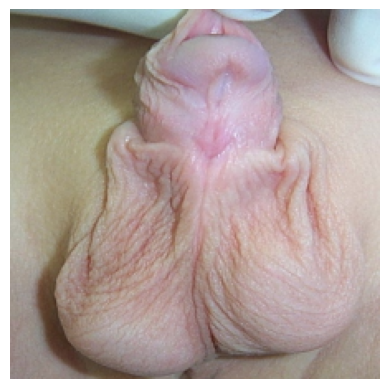

In [257]:
plt.axis('off')
plt.imshow(main) #, cmap='gray')

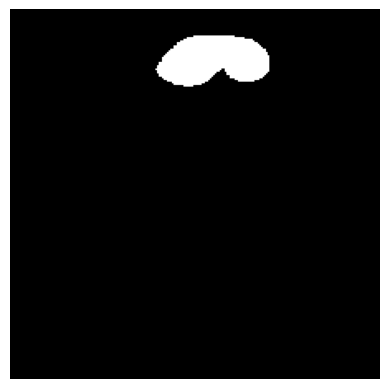

In [258]:
plt.axis('off')
plt.imshow(seg, cmap='gray')

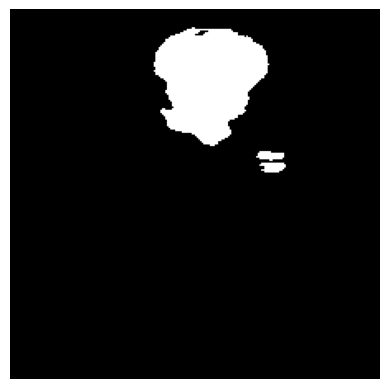

In [259]:
plt.axis('off')
plt.imshow(seg_pred, cmap='gray')

Done!


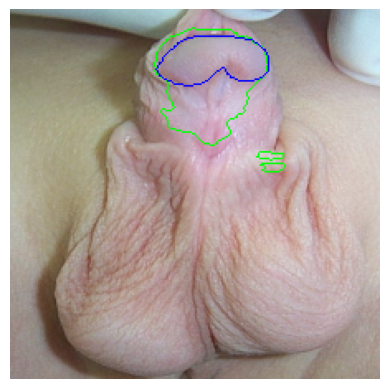

In [260]:

# Find external contours
contours, _ = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
pred_contours, _ = cv2.findContours(seg_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

line_thickness = 1

cv2.drawContours(main, pred_contours, -1, (0, 255, 0), line_thickness)   # Yellow outline for prediction
cv2.drawContours(main, contours, -1, (0, 0, 255), line_thickness)  # Red outline for truth

# cv2.imwrite(f'overlay.png', main)
plt.axis('off')
plt.imshow(main) #, cmap='gray')

print('Done!')